In [30]:
# Load the discharge_df
# Preparing data for model fitting phase (Box-Jenkins: Estimation)

import pandas as pd

discharge_df = pd.read_csv('../data/discharge_df.csv')
discharge_df['start_datetime'] = pd.to_datetime(discharge_df['start_datetime'])
discharge_df['Capacity'] = pd.to_numeric(discharge_df['Capacity'], errors='coerce')


In [31]:
# Import necessary modeling and diagnostic libraries

import matplotlib.pyplot as plt
import joblib
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm


In [32]:
# Pick the same sample batteries

sample_batteries = discharge_df['battery_id'].unique()[:4]


In [33]:
# Define manual (p,d,q) orders based on ACF/PACF

manual_orders = {
    'B0005': (1,1,1),
    'B0006': (1,1,1),
    'B0007': (1,1,1),
    'B0018': (3,1,2)
}


In [34]:
# Function to fit ARIMA model and save it
# Box-Jenkins: Model Estimation phase

def fit_arima_model(series, order, battery_id):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    print(f"Model fitted for {battery_id}")
    joblib.dump(model_fit, f'../results/models/{battery_id}_arima.pkl')
    print(f"Model saved for {battery_id}")
    return model_fit


In [35]:
# Function to plot residual diagnostics
# Box-Jenkins: Diagnostic checking of model errors

def plot_residuals_diagnostics(model_fit, battery_id):
    residuals = model_fit.resid
    
    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    
    axes[0].plot(residuals)
    axes[0].set_title(f'Residuals Time Plot - {battery_id}')
    
    axes[1].hist(residuals, bins=30, edgecolor='black')
    axes[1].set_title(f'Residuals Histogram - {battery_id}')
    
    sm.qqplot(residuals, line='s', ax=axes[2])
    axes[2].set_title(f'Q-Q Plot - {battery_id}')
    
    plt.tight_layout()
    plt.show()


In [36]:
# Function to perform residual normality and autocorrelation tests

def residual_tests(model_fit, battery_id):
    residuals = model_fit.resid.dropna()
    
    print(f"\nResidual Tests for {battery_id}")
    
    # Shapiro-Wilk Test for Normality
    stat, p = shapiro(residuals)
    if p > 0.05:
        print("Residuals look Gaussian (Shapiro p > 0.05)")
    else:
        print("Residuals NOT Gaussian (Shapiro p < 0.05)")
    
    # Ljung-Box Test for Autocorrelation
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_pvalue = lb_test['lb_pvalue'].values[0]
    
    if lb_pvalue > 0.05:
        print("Residuals are independent (Ljung-Box p > 0.05)")
    else:
        print("Residuals show autocorrelation (Ljung-Box p < 0.05)")


In [37]:
discharge_df['capacity_diff'] = discharge_df.groupby('battery_id')['Capacity'].diff()



Fitting ARIMA(1, 1, 1) for Battery B0005
Model fitted for B0005
Model saved for B0005


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

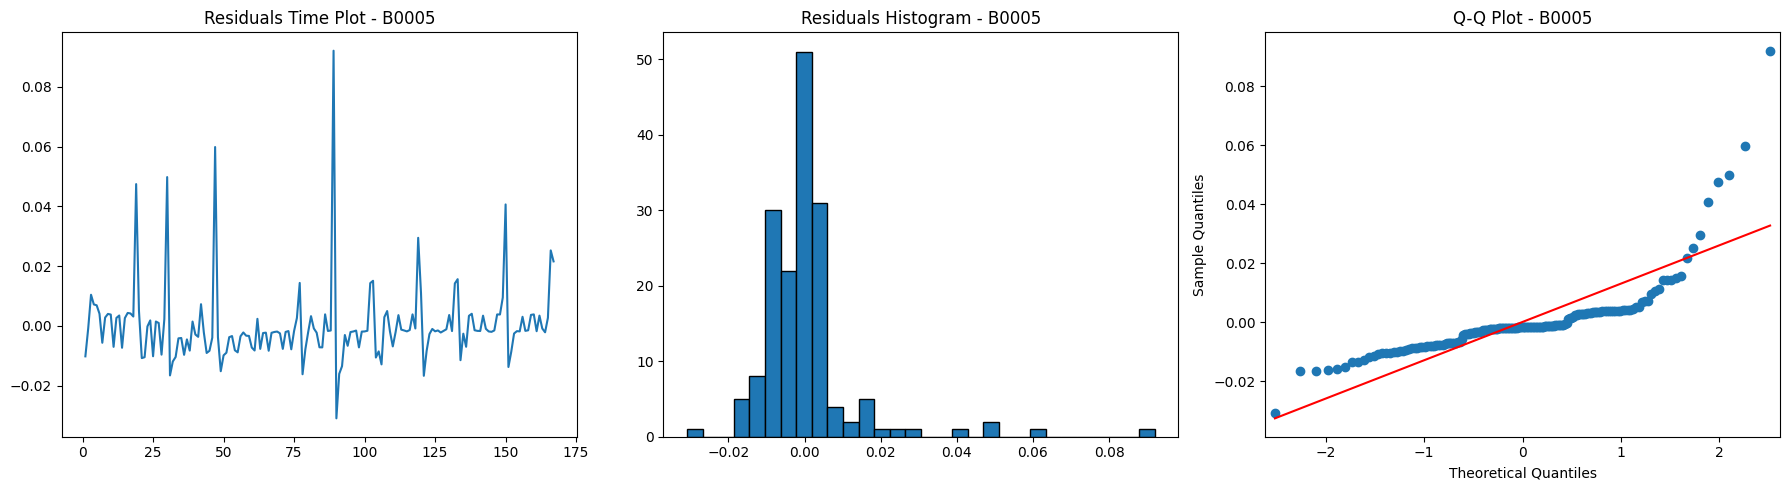


Residual Tests for B0005
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)

Fitting ARIMA(1, 1, 1) for Battery B0006
Model fitted for B0006
Model saved for B0006


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

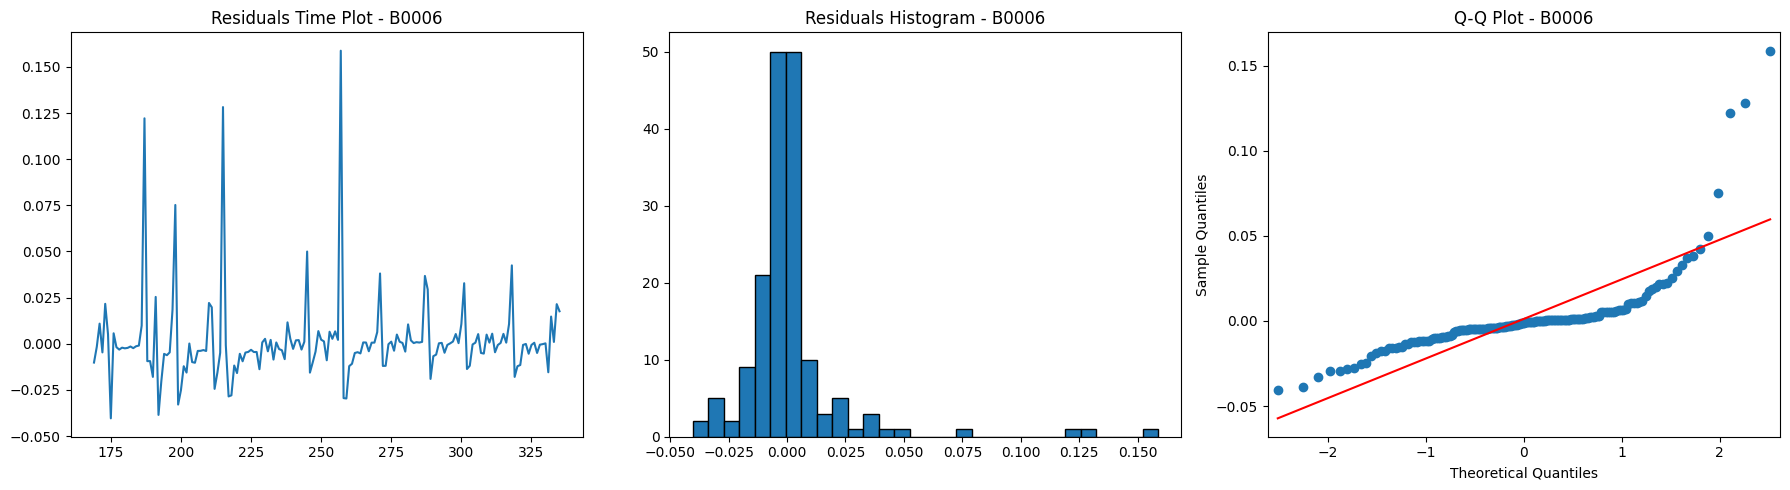


Residual Tests for B0006
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)

Fitting ARIMA(1, 1, 1) for Battery B0007
Model fitted for B0007
Model saved for B0007


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

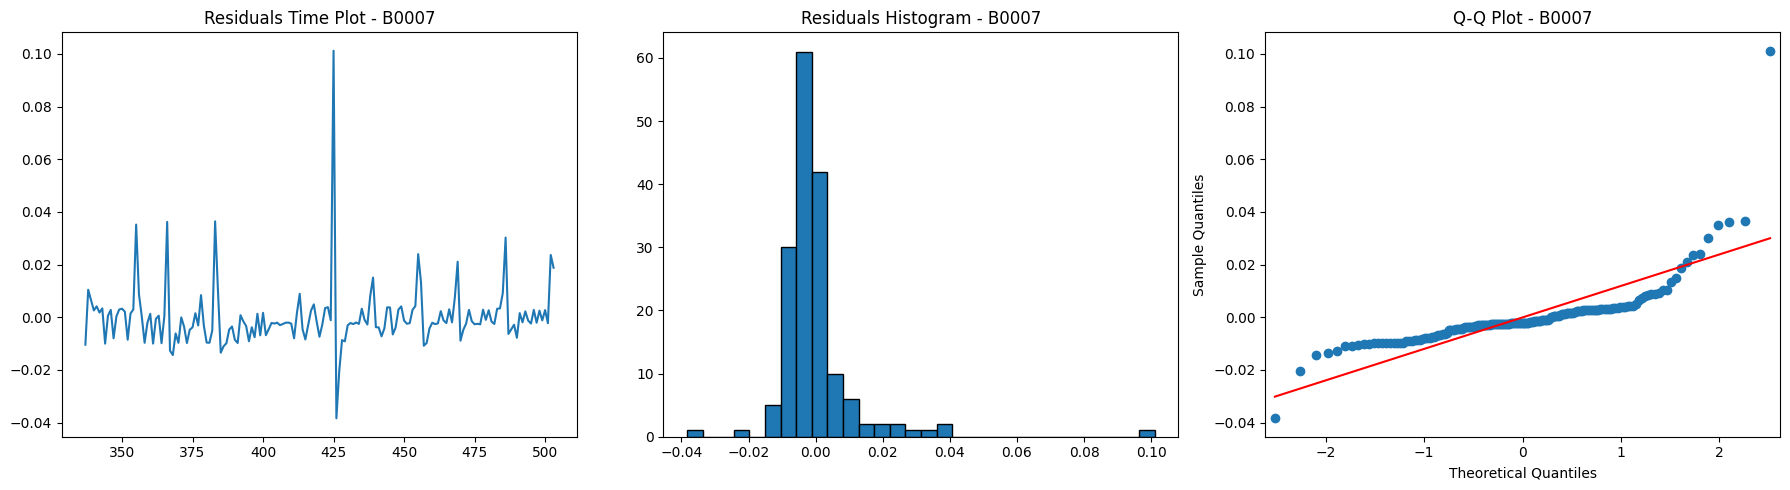


Residual Tests for B0007
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)

Fitting ARIMA(3, 1, 2) for Battery B0018
Model fitted for B0018


/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/parthsarthisrivastava/Library/CloudStorage/OneDrive-stevens.edu/Classes/Spring '25/stevens/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To us

Model saved for B0018


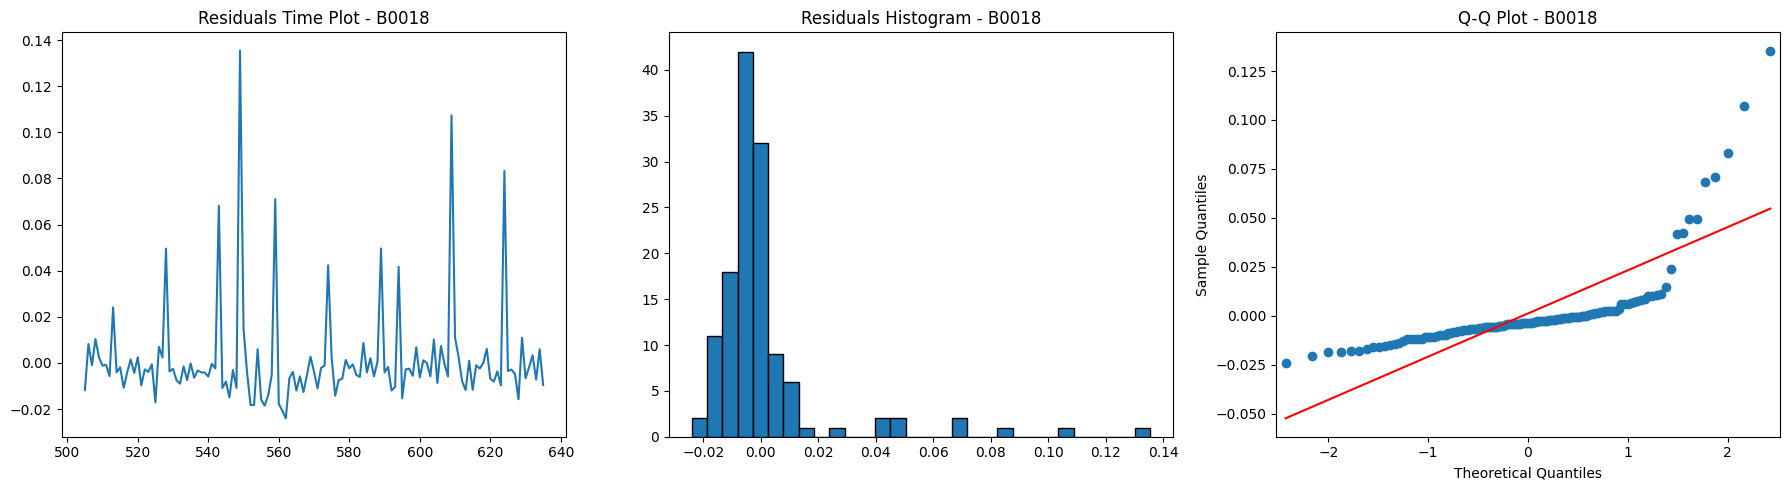


Residual Tests for B0018
Residuals NOT Gaussian (Shapiro p < 0.05)
Residuals are independent (Ljung-Box p > 0.05)


In [40]:
# Loop through each battery, fit model, plot residuals, perform tests

for battery_id in sample_batteries:
    temp = discharge_df[discharge_df['battery_id'] == battery_id]
    
    series = temp['capacity_diff'].dropna()
    order = manual_orders[battery_id]
    
    print(f"\nFitting ARIMA{order} for Battery {battery_id}")
    model_fit = fit_arima_model(series, order, battery_id)
    
    plot_residuals_diagnostics(model_fit, battery_id)
    residual_tests(model_fit, battery_id)
